# **Prescriptive Analysis for Delhi Air Quality.**

# Importing necessary libraries & data.





In [ ]:
pip install sorted_months_weekdays

  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-cp36-none-any.whl size=3240 sha256=65193f3f880a28b81f44d27888ff56409a246428cd290035b670e9590b575cc6
  Stored in directory: /root/.cache/pip/wheels/11/2f/19/05e3f8e6a6d06a2e962f0a172bc9736451f6518e2db6d1ab6d
Successfully built sorted-months-weekdays


In [ ]:
pip install sort_dataframeby_monthorweek

  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-cp36-none-any.whl size=3438 sha256=5d19ad5614c19aa40a1aafe129c3938149642e2f0fff8c7bc6d7fed9f0374f53
  Stored in directory: /root/.cache/pip/wheels/4c/35/02/083a8cdd13de15416e153a50324450c15189d259c861f9f964
Successfully built sort-dataframeby-monthorweek


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *
from sklearn.preprocessing import Normalizer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv("/content/drive/My Drive/Datasets/Delhi_air_quality_project/data.csv")
data.head()

,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5
0,55,05-01-15,Delhi,Delhi,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,44.0,203.0,NaN
1,55,08-01-15,Delhi,Delhi,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,45.0,214.0,NaN
2,55,13-01-15,Delhi,Delhi,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,47.0,182.0,NaN
3,55,16-01-15,Delhi,Delhi,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,43.0,204.0,78.0
4,55,21-01-15,Delhi,Delhi,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,39.0,192.0,83.0


# Data Cleaning

In [ ]:
data.rename(columns={"Stn Code":"Stn_code","Sampling Date":"sampling_date", "State":"state","City/Town/Village/Area":"city",
"Location of Monitoring Station":"Location","Agency":"agency","Type of Location":"type_of_location","RSPM/PM10":"RSPM","PM 2.5":"PM"},inplace=True)
data.columns

Index(['Stn_code', 'sampling_date', 'state', 'city', 'Location', 'agency',
       'type_of_location', 'SO2', 'NO2', 'RSPM', 'PM'],
      dtype='object')

# Basic Infromation about data.

In [ ]:
print("Station code:",data.Stn_code.unique())
print("-"*60)
print("Location:",data.Location.unique())
print("-"*60)
print("agency:",data.agency.unique())
print("-"*60)
print("type_of_location:",data.type_of_location.unique())
print("-"*60)

Station code: [ 55  57  58  59  60 144 146 345 531]
------------------------------------------------------------
Location: ['Nizamuddin, Delhi' 'Shahzada Bagh, Delhi' 'Shahadra, Delhi'
 'Janakpuri, Delhi' 'Siri Fort, Delhi'
 'N.Y. SCHOOL, Sarojini Nagar, Delhi'
 'Town Hall, Ayurvedic Dispensary, Chandni Chowk, Delhi'
 'Mayapuri Industrial Area, Delhi' 'Pritampura, Delhi']
------------------------------------------------------------
agency: ['Central Pollution Control Board'
 'National Environmental Engineering Research Institute']
------------------------------------------------------------
type_of_location: ['Residential, Rural and other Areas' 'Industrial Area']
------------------------------------------------------------


Here, We can observe that there are nine places where data collection was done by two different organizations Some places are Residential area and some are industrial area among this. 

# Setting date for Time series analysis


In [ ]:
data['sampling_date']=pd.to_datetime(data['sampling_date'])

In [ ]:
data.head()

,Stn_code,sampling_date,state,city,Location,agency,type_of_location,SO2,NO2,RSPM,PM
0,55,2015-05-01,Delhi,Delhi,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,44.0,203.0,NaN
1,55,2015-08-01,Delhi,Delhi,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,45.0,214.0,NaN
2,55,2015-01-13,Delhi,Delhi,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,47.0,182.0,NaN
3,55,2015-01-16,Delhi,Delhi,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,43.0,204.0,78.0
4,55,2015-01-21,Delhi,Delhi,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,39.0,192.0,83.0


# Dropping unnecessary columns from Dataframe and checking missing values.

In [ ]:
data=data.drop(columns={"Stn_code","state","city"})

We will remove Stn_code,State and city because we don't need that information in our analysis.

In [ ]:
data=data.sort_values(by='sampling_date')

In [ ]:
data.isna().sum()

sampling_date         0
Location              0
agency                0
type_of_location      0
SO2                  13
NO2                  12
RSPM                 11
PM                  373
dtype: int64

# Seprating data based on agency and location.

Before starting the analysis we have to separate two organization's data because here we don't know that what kind of assumptions were made by particular organizations.

In [ ]:
data_CPB=data[data.agency == "Central Pollution Control Board"]
data_CPB.count()

sampling_date       463
Location            463
agency              463
type_of_location    463
SO2                 450
NO2                 451
RSPM                452
PM                  371
dtype: int64

In [ ]:
data_NEI=data[data.agency == "National Environmental Engineering Research Institute"]
data_NEI.count()

sampling_date       281
Location            281
agency              281
type_of_location    281
SO2                 281
NO2                 281
RSPM                281
PM                    0
dtype: int64

# Handling missing values using feed forward method.

We will use forward fill method to fill missing value because if you take real world example today's AQI will not be very different from yesterday's AQI.

In [ ]:
data_CPB=data_CPB.fillna(method="ffill")
data_CPB.count()

sampling_date       463
Location            463
agency              463
type_of_location    463
SO2                 463
NO2                 463
RSPM                463
PM                  462
dtype: int64

In [ ]:
data_CPB.dropna(axis=0,inplace=True)
data_CPB.count()

sampling_date       462
Location            462
agency              462
type_of_location    462
SO2                 462
NO2                 462
RSPM                462
PM                  462
dtype: int64

In [ ]:
data_NEI=data_NEI.fillna(method="ffill")
data_NEI.count()

sampling_date       281
Location            281
agency              281
type_of_location    281
SO2                 281
NO2                 281
RSPM                281
PM                    0
dtype: int64

In [ ]:
data_NEI.dropna(axis=1,inplace=True)
data_NEI.count()

sampling_date       281
Location            281
agency              281
type_of_location    281
SO2                 281
NO2                 281
RSPM                281
dtype: int64

# Analysing data collected by Central pollution board control.

We know that there are two types of area in this data 1)Residential 2)Industrial
now we will divide this data according to location type because pollution is generally high in the industrial area.So we will analyse this two types of data differently.

### Spliting data according to type of location.

In [ ]:
CPB_residential=data_CPB[data_CPB.type_of_location=="Residential, Rural and other Areas"]
CPB_residential.head()

,sampling_date,Location,agency,type_of_location,SO2,NO2,RSPM,PM
19,2015-01-04,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,50.0,206.0,78.0
684,2015-01-04,"Pritampura, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,31.0,116.0,81.0
24,2015-01-05,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,39.0,209.0,29.0
689,2015-01-05,"Pritampura, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,35.0,233.0,29.0
341,2015-01-06,"Siri Fort, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,45.0,151.0,28.0


In [ ]:
CPB_industrial=data_CPB[data_CPB.type_of_location=="Industrial Area"]
CPB_industrial.head()

,sampling_date,Location,agency,type_of_location,SO2,NO2,RSPM,PM
78,2015-01-01,"Shahzada Bagh, Delhi",Central Pollution Control Board,Industrial Area,4.0,67.0,397.0,110.0
109,2015-01-06,"Shahzada Bagh, Delhi",Central Pollution Control Board,Industrial Area,4.0,50.0,258.0,28.0
116,2015-01-07,"Shahzada Bagh, Delhi",Central Pollution Control Board,Industrial Area,4.0,49.0,246.0,39.0
130,2015-01-09,"Shahzada Bagh, Delhi",Central Pollution Control Board,Industrial Area,4.0,57.0,217.0,34.0
149,2015-01-12,"Shahzada Bagh, Delhi",Central Pollution Control Board,Industrial Area,4.0,74.0,254.0,51.0


### What is the concentration of SO2 in Delhi's air? 

In [ ]:
monthwise_data_industrial=CPB_industrial.groupby(CPB_industrial['sampling_date'].dt.strftime('%B'))['SO2'].sum()
monthwise_data_industrial=pd.DataFrame(monthwise_data_industrial)
monthwise_data_industrial=monthwise_data_industrial.reset_index()
monthwise_data_industrial=Sort_Dataframeby_MonthandNumeric_cols(df = monthwise_data_industrial, monthcolumn='sampling_date',numericcolumn='SO2')
###------------------------------------------------------------------------------------------------------------------------------------------------
monthwise_data_residential=CPB_residential.groupby(CPB_residential['sampling_date'].dt.strftime('%B'))['SO2'].sum()
monthwise_data_residential=pd.DataFrame(monthwise_data_residential)
monthwise_data_residential=monthwise_data_residential.reset_index()
monthwise_data_residential=Sort_Dataframeby_MonthandNumeric_cols(df = monthwise_data_residential, monthcolumn='sampling_date',numericcolumn='SO2')

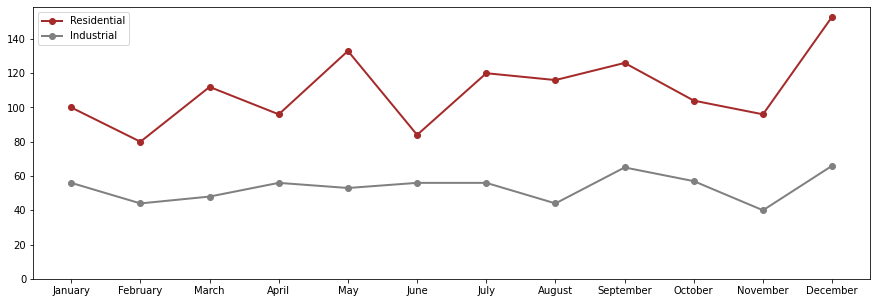

In [ ]:
plt.figure(figsize=(15,5))
plt.plot('sampling_date','SO2', data=monthwise_data_residential, marker='o', color='brown', linewidth=2)
plt.plot('sampling_date','SO2', data=monthwise_data_industrial, marker='o', color='grey', linewidth=2)
plt.legend(['Residential','Industrial'])
plt.ylim(0)
plt.show()

Here,We can observe that Residential area is prime contributor of SO2 in Delhi's air quality.Since main source of SO2 is burning oil and gas and we mostly use oil and gas in vehicle so goverment should come up with policy to reduce vehicle.

### What is the concentration of NO2 in Delhi's air?

In [ ]:
monthwise_data_industrial=CPB_industrial.groupby(CPB_industrial['sampling_date'].dt.strftime('%B'))['NO2'].sum()
monthwise_data_industrial=pd.DataFrame(monthwise_data_industrial)
monthwise_data_industrial=monthwise_data_industrial.reset_index()
monthwise_data_industrial=Sort_Dataframeby_MonthandNumeric_cols(df = monthwise_data_industrial, monthcolumn='sampling_date',numericcolumn='NO2')
###------------------------------------------------------------------------------------------------------------------------------------------------
monthwise_data_residential=CPB_residential.groupby(CPB_residential['sampling_date'].dt.strftime('%B'))['NO2'].sum()
monthwise_data_residential=pd.DataFrame(monthwise_data_residential)
monthwise_data_residential=monthwise_data_residential.reset_index()
monthwise_data_residential=Sort_Dataframeby_MonthandNumeric_cols(df = monthwise_data_residential, monthcolumn='sampling_date',numericcolumn='NO2')

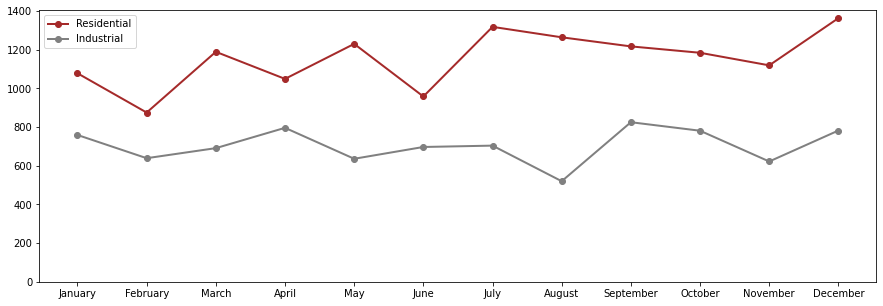

In [ ]:
plt.figure(figsize=(15,5))
plt.plot('sampling_date','NO2', data=monthwise_data_residential, marker='o', color='brown', linewidth=2)
plt.plot('sampling_date','NO2', data=monthwise_data_industrial, marker='o', color='grey', linewidth=2)
plt.legend(['Residential','Industrial'])
plt.ylim(0)
plt.show()

### What is the concentration of RSPM in Delhi's air?

In [ ]:
monthwise_data_industrial=CPB_industrial.groupby(CPB_industrial['sampling_date'].dt.strftime('%B'))['RSPM'].sum()
monthwise_data_industrial=pd.DataFrame(monthwise_data_industrial)
monthwise_data_industrial=monthwise_data_industrial.reset_index()
monthwise_data_industrial=Sort_Dataframeby_MonthandNumeric_cols(df = monthwise_data_industrial, monthcolumn='sampling_date',numericcolumn='RSPM')
###------------------------------------------------------------------------------------------------------------------------------------------------
monthwise_data_residential=CPB_residential.groupby(CPB_residential['sampling_date'].dt.strftime('%B'))['RSPM'].sum()
monthwise_data_residential=pd.DataFrame(monthwise_data_residential)
monthwise_data_residential=monthwise_data_residential.reset_index()
monthwise_data_residential=Sort_Dataframeby_MonthandNumeric_cols(df = monthwise_data_residential, monthcolumn='sampling_date',numericcolumn='RSPM')

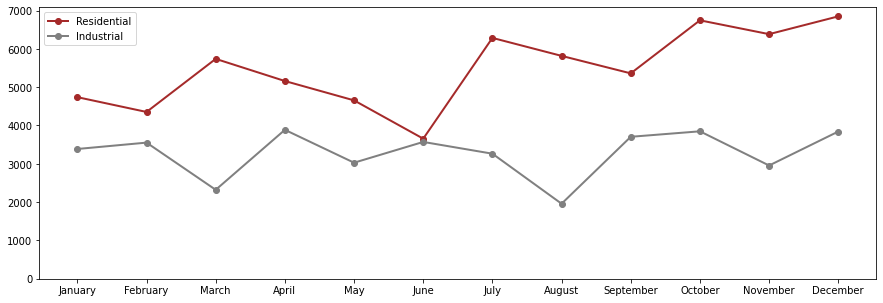

In [ ]:
plt.figure(figsize=(15,5))
plt.plot('sampling_date','RSPM', data=monthwise_data_residential, marker='o', color='brown', linewidth=2)
plt.plot('sampling_date','RSPM', data=monthwise_data_industrial, marker='o', color='grey', linewidth=2)
plt.legend(['Residential','Industrial'])
plt.ylim(0)
plt.show()

### What is the concentration of  PM in Delhi's air?

In [ ]:
monthwise_data_industrial=CPB_industrial.groupby(CPB_industrial['sampling_date'].dt.strftime('%B'))['PM'].sum()
monthwise_data_industrial=pd.DataFrame(monthwise_data_industrial)
monthwise_data_industrial=monthwise_data_industrial.reset_index()
monthwise_data_industrial=Sort_Dataframeby_MonthandNumeric_cols(df = monthwise_data_industrial, monthcolumn='sampling_date',numericcolumn='PM')
###------------------------------------------------------------------------------------------------------------------------------------------------
monthwise_data_residential=CPB_residential.groupby(CPB_residential['sampling_date'].dt.strftime('%B'))['PM'].sum()
monthwise_data_residential=pd.DataFrame(monthwise_data_residential)
monthwise_data_residential=monthwise_data_residential.reset_index()
monthwise_data_residential=Sort_Dataframeby_MonthandNumeric_cols(df = monthwise_data_residential, monthcolumn='sampling_date',numericcolumn='PM')

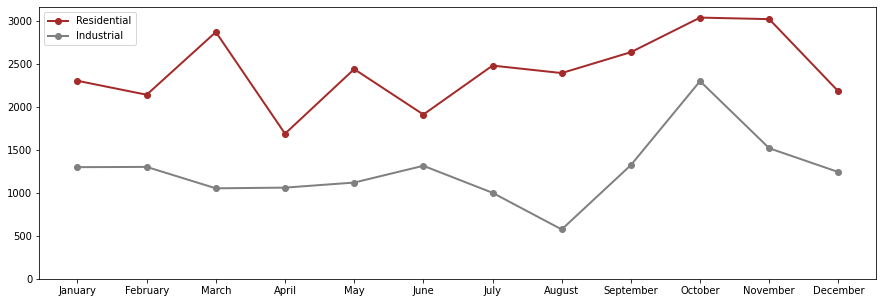

In [ ]:
plt.figure(figsize=(15,5))
plt.plot('sampling_date','PM', data=monthwise_data_residential, marker='o', color='brown', linewidth=2)
plt.plot('sampling_date','PM', data=monthwise_data_industrial, marker='o', color='grey', linewidth=2)
plt.legend(['Residential','Industrial'])
plt.ylim(0)
plt.show()

## Location based Analysis

In [ ]:
def locationwise_plot(data,column_name,color,title):
    locationwise_data=data.groupby(data['Location'])[column_name].sum()
    locationwise_data=pd.DataFrame(locationwise_data)
    locationwise_data=locationwise_data.reset_index()
    plt.figure(figsize=(10,5))
    plt.ylabel('Total NO2')
    plt.title(title)
    plt.bar(locationwise_data['Location'],locationwise_data[column_name], align='center',color=color)
    plt.show()
    return locationwise_data.head()

#### Which Residential Area is highly polluted in Delhi?

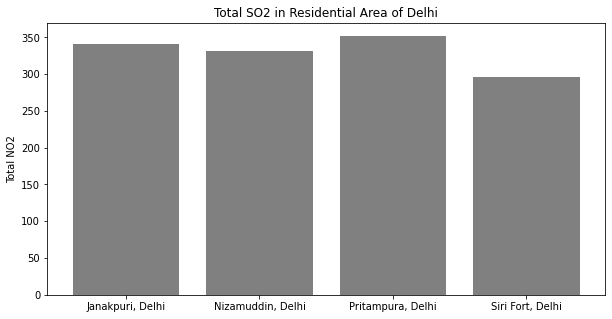

,Location,SO2
0,"Janakpuri, Delhi",341.0
1,"Nizamuddin, Delhi",331.0
2,"Pritampura, Delhi",352.0
3,"Siri Fort, Delhi",296.0


In [ ]:
locationwise_plot(CPB_residential,'SO2','grey','Total SO2 in Residential Area of Delhi')

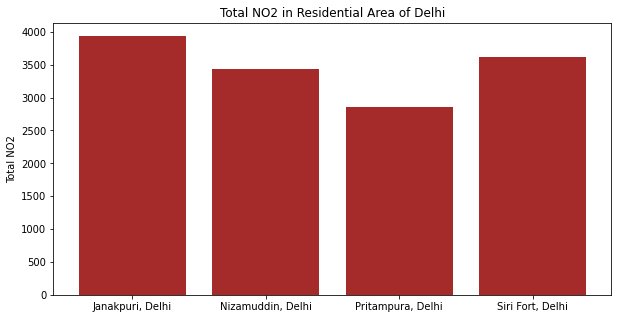

,Location,NO2
0,"Janakpuri, Delhi",3937.0
1,"Nizamuddin, Delhi",3435.0
2,"Pritampura, Delhi",2856.0
3,"Siri Fort, Delhi",3616.0


In [ ]:
locationwise_plot(CPB_residential,'NO2','brown','Total NO2 in Residential Area of Delhi')

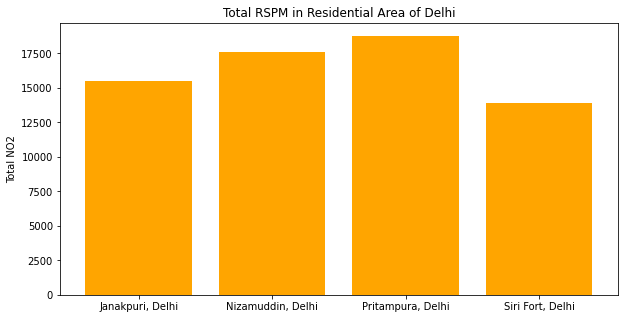

,Location,RSPM
0,"Janakpuri, Delhi",15497.0
1,"Nizamuddin, Delhi",17576.0
2,"Pritampura, Delhi",18766.0
3,"Siri Fort, Delhi",13897.0


In [ ]:
locationwise_plot(CPB_residential,'RSPM','orange','Total RSPM in Residential Area of Delhi')

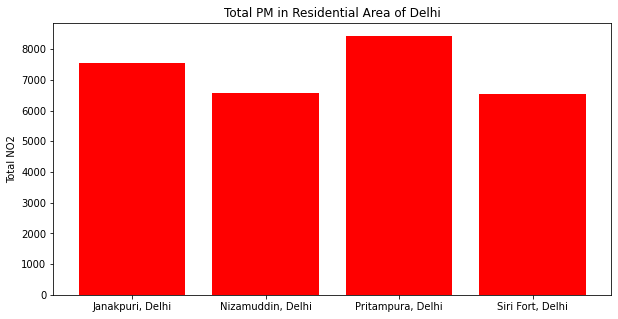

,Location,PM
0,"Janakpuri, Delhi",7553.0
1,"Nizamuddin, Delhi",6561.0
2,"Pritampura, Delhi",8429.0
3,"Siri Fort, Delhi",6544.0


In [ ]:
locationwise_plot(CPB_residential,'PM','red','Total PM in Residential Area of Delhi')

#### Which industrial Area is highly polluted in Delhi?

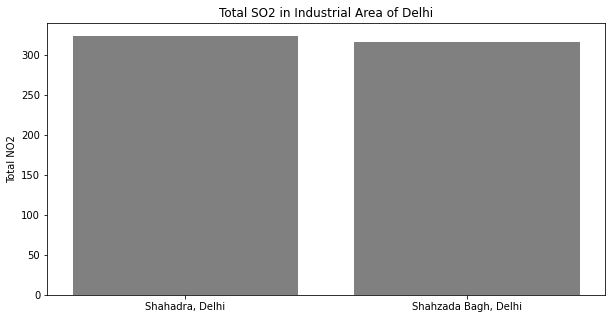

,Location,SO2
0,"Shahadra, Delhi",324.0
1,"Shahzada Bagh, Delhi",317.0


In [ ]:
locationwise_plot(CPB_industrial,'SO2','grey','Total SO2 in Industrial Area of Delhi')

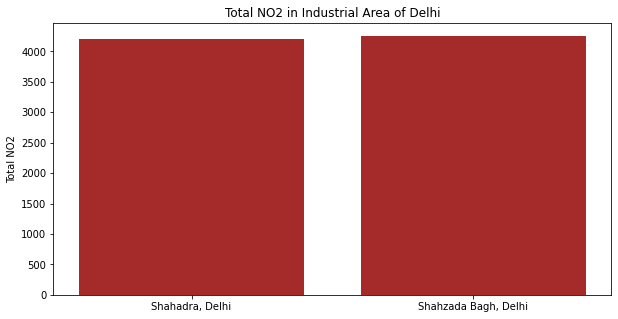

,Location,NO2
0,"Shahadra, Delhi",4198.0
1,"Shahzada Bagh, Delhi",4254.0


In [ ]:
locationwise_plot(CPB_industrial,'NO2','brown','Total NO2 in Industrial Area of Delhi')

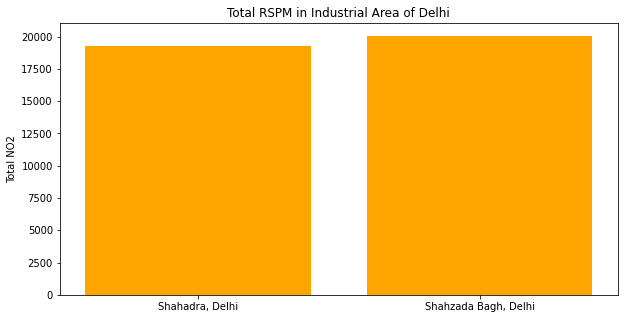

,Location,RSPM
0,"Shahadra, Delhi",19269.0
1,"Shahzada Bagh, Delhi",20054.0


In [ ]:
locationwise_plot(CPB_industrial,'RSPM','orange','Total RSPM in Industrial Area of Delhi')

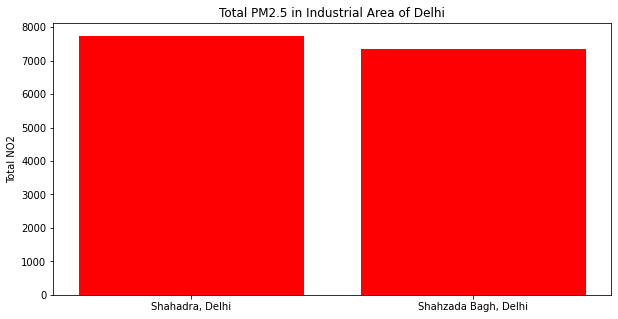

,Location,PM
0,"Shahadra, Delhi",7737.0
1,"Shahzada Bagh, Delhi",7360.0


In [ ]:
locationwise_plot(CPB_industrial,'PM','red','Total PM2.5 in Industrial Area of Delhi')

# Analysing data collected by National Environmental Engineering Research Institute.

In [ ]:
NEI_residential=data_NEI[data_NEI.type_of_location=="Residential, Rural and other Areas"]
NEI_residential.head()

,sampling_date,Location,agency,type_of_location,SO2,NO2,RSPM
407,2015-01-04,"N.Y. SCHOOL, Sarojini Nagar, Delhi",National Environmental Engineering Research In...,"Residential, Rural and other Areas",13.0,87.0,117.0
524,2015-01-07,"Town Hall, Ayurvedic Dispensary, Chandni Chowk...",National Environmental Engineering Research In...,"Residential, Rural and other Areas",2.0,29.0,72.0
540,2015-01-09,"Town Hall, Ayurvedic Dispensary, Chandni Chowk...",National Environmental Engineering Research In...,"Residential, Rural and other Areas",2.0,47.0,110.0
388,2015-01-14,"N.Y. SCHOOL, Sarojini Nagar, Delhi",National Environmental Engineering Research In...,"Residential, Rural and other Areas",8.0,117.0,162.0
389,2015-01-15,"N.Y. SCHOOL, Sarojini Nagar, Delhi",National Environmental Engineering Research In...,"Residential, Rural and other Areas",10.0,107.0,179.0


In [ ]:
NEI_industrial=data_NEI[data_NEI.type_of_location=="Industrial Area"]
NEI_industrial.head()

,sampling_date,Location,agency,type_of_location,SO2,NO2,RSPM
618,2015-01-07,"Mayapuri Industrial Area, Delhi",National Environmental Engineering Research In...,Industrial Area,2.0,23.0,164.0
634,2015-01-09,"Mayapuri Industrial Area, Delhi",National Environmental Engineering Research In...,Industrial Area,2.0,70.0,171.0
571,2015-01-14,"Mayapuri Industrial Area, Delhi",National Environmental Engineering Research In...,Industrial Area,9.0,99.0,344.0
572,2015-01-15,"Mayapuri Industrial Area, Delhi",National Environmental Engineering Research In...,Industrial Area,10.0,98.0,304.0
573,2015-01-16,"Mayapuri Industrial Area, Delhi",National Environmental Engineering Research In...,Industrial Area,8.0,122.0,374.0


In [ ]:
monthwise_data_industrial=NEI_industrial.groupby(NEI_industrial['sampling_date'].dt.strftime('%B'))['SO2'].sum()
monthwise_data_industrial=pd.DataFrame(monthwise_data_industrial)
monthwise_data_industrial=monthwise_data_industrial.reset_index()
monthwise_data_industrial=Sort_Dataframeby_MonthandNumeric_cols(df = monthwise_data_industrial, monthcolumn='sampling_date',numericcolumn='SO2')
###------------------------------------------------------------------------------------------------------------------------------------------------
monthwise_data_residential=NEI_residential.groupby(NEI_residential['sampling_date'].dt.strftime('%B'))['SO2'].sum()
monthwise_data_residential=pd.DataFrame(monthwise_data_residential)
monthwise_data_residential=monthwise_data_residential.reset_index()
monthwise_data_residential=Sort_Dataframeby_MonthandNumeric_cols(df = monthwise_data_residential, monthcolumn='sampling_date',numericcolumn='SO2')

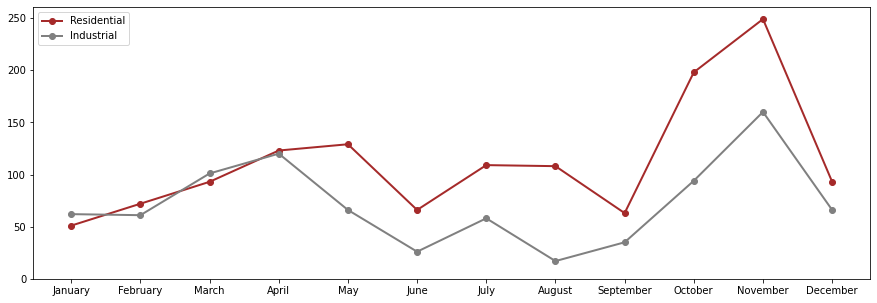

In [ ]:
plt.figure(figsize=(15,5))
plt.plot('sampling_date','SO2', data=monthwise_data_residential, marker='o', color='brown', linewidth=2)
plt.plot('sampling_date','SO2', data=monthwise_data_industrial, marker='o', color='grey', linewidth=2)
plt.legend(['Residential','Industrial'])
plt.ylim(0)
plt.show()

In [ ]:
monthwise_data_industrial=NEI_industrial.groupby(NEI_industrial['sampling_date'].dt.strftime('%B'))['NO2'].sum()
monthwise_data_industrial=pd.DataFrame(monthwise_data_industrial)
monthwise_data_industrial=monthwise_data_industrial.reset_index()
monthwise_data_industrial=Sort_Dataframeby_MonthandNumeric_cols(df = monthwise_data_industrial, monthcolumn='sampling_date',numericcolumn='NO2')
###------------------------------------------------------------------------------------------------------------------------------------------------
monthwise_data_residential=NEI_residential.groupby(NEI_residential['sampling_date'].dt.strftime('%B'))['NO2'].sum()
monthwise_data_residential=pd.DataFrame(monthwise_data_residential)
monthwise_data_residential=monthwise_data_residential.reset_index()
monthwise_data_residential=Sort_Dataframeby_MonthandNumeric_cols(df = monthwise_data_residential, monthcolumn='sampling_date',numericcolumn='NO2')

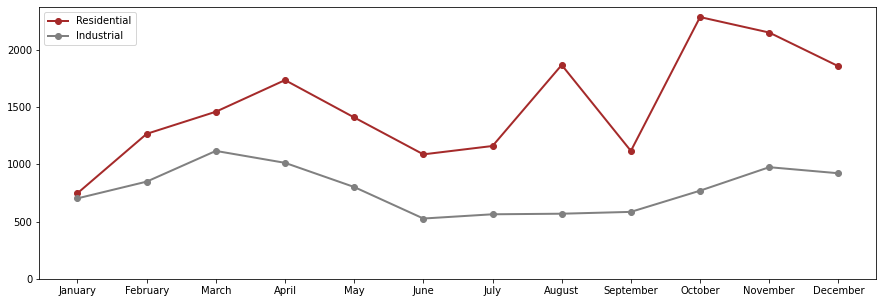

In [ ]:
plt.figure(figsize=(15,5))
plt.plot('sampling_date','NO2', data=monthwise_data_residential, marker='o', color='brown', linewidth=2)
plt.plot('sampling_date','NO2', data=monthwise_data_industrial, marker='o', color='grey', linewidth=2)
plt.legend(['Residential','Industrial'])
plt.ylim(0)
plt.show()

In [ ]:
monthwise_data_industrial=NEI_industrial.groupby(NEI_industrial['sampling_date'].dt.strftime('%B'))['RSPM'].sum()
monthwise_data_industrial=pd.DataFrame(monthwise_data_industrial)
monthwise_data_industrial=monthwise_data_industrial.reset_index()
monthwise_data_industrial=Sort_Dataframeby_MonthandNumeric_cols(df = monthwise_data_industrial, monthcolumn='sampling_date',numericcolumn='RSPM')
###------------------------------------------------------------------------------------------------------------------------------------------------
monthwise_data_residential=NEI_residential.groupby(NEI_residential['sampling_date'].dt.strftime('%B'))['RSPM'].sum()
monthwise_data_residential=pd.DataFrame(monthwise_data_residential)
monthwise_data_residential=monthwise_data_residential.reset_index()
monthwise_data_residential=Sort_Dataframeby_MonthandNumeric_cols(df = monthwise_data_residential, monthcolumn='sampling_date',numericcolumn='RSPM')

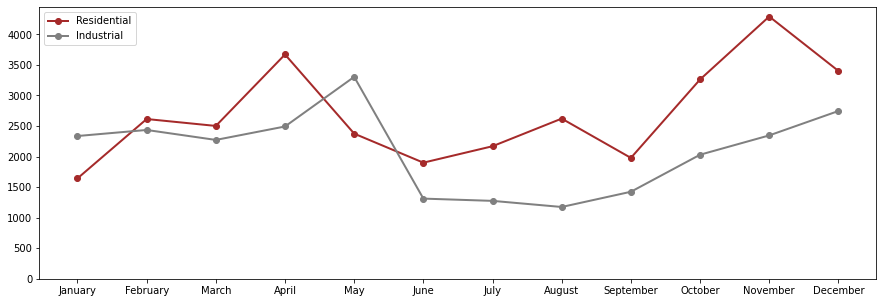

In [ ]:
plt.figure(figsize=(15,5))
plt.plot('sampling_date','RSPM', data=monthwise_data_residential, marker='o', color='brown', linewidth=2)
plt.plot('sampling_date','RSPM', data=monthwise_data_industrial, marker='o', color='grey', linewidth=2)
plt.legend(['Residential','Industrial'])
plt.ylim(0)
plt.show()

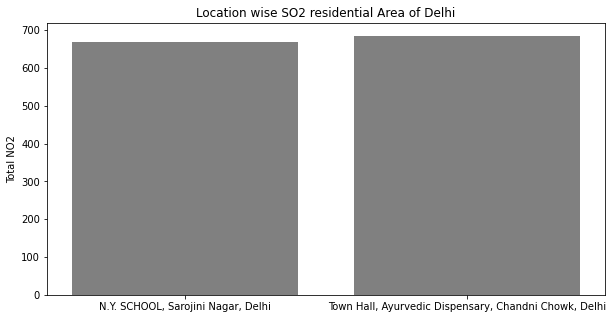

,Location,SO2
0,"N.Y. SCHOOL, Sarojini Nagar, Delhi",669.0
1,"Town Hall, Ayurvedic Dispensary, Chandni Chowk...",685.0


In [ ]:
locationwise_plot(NEI_residential,'SO2','grey','Location wise SO2 residential Area of Delhi')

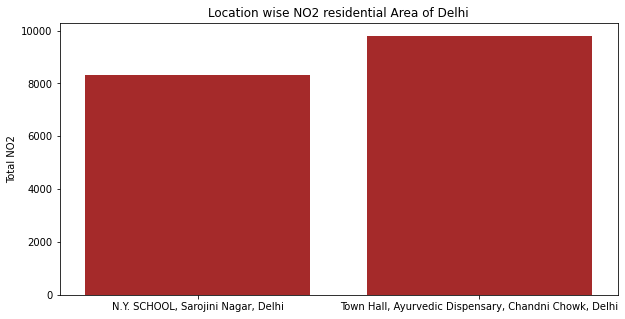

,Location,NO2
0,"N.Y. SCHOOL, Sarojini Nagar, Delhi",8332.0
1,"Town Hall, Ayurvedic Dispensary, Chandni Chowk...",9795.0


In [ ]:
locationwise_plot(NEI_residential,'NO2','brown','Location wise NO2 residential Area of Delhi')

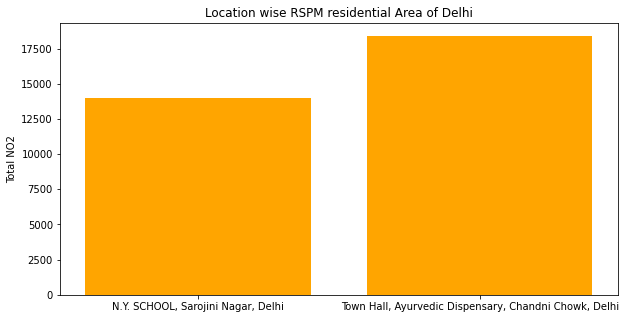

,Location,RSPM
0,"N.Y. SCHOOL, Sarojini Nagar, Delhi",14024.0
1,"Town Hall, Ayurvedic Dispensary, Chandni Chowk...",18400.0


In [ ]:
locationwise_plot(NEI_residential,'RSPM','orange','Location wise RSPM residential Area of Delhi')

## Conclusion

What can we do to reduce air pollution in delhi?

1)First,we can reduce the use of vehicles.

2)Government should enforce strict rules in highly polluted area such as pritampura,janakpuri.

3)We can see that N.Y. School have high amount of SO2 concentration which can harm students.In that area we can grow more trees and other restrictions to reduce concentration.